In [ ]:
import yaml

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/vechical-plate-detection-20250418T093815Z-001.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
with open('/content/vechical-plate-detection/data.yml','r') as f:
  data = yaml.safe_load(f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 2, 'names': ['vehicle', 'license-plate']}


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!yolo task=detect \
    mode=train \
    model=yolov8s.pt \
    data=/content/vechical-plate-detection/data.yml \
    epochs=300 \
    imgsz=640 \
    batch=16

100% 21.5M/21.5M [00:00<00:00, 261MB/s]
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/vechical-plate-detection/data.yml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

In [ ]:
!pip install -q pytesseract
!apt-get install -y tesseract-ocr
!pip install -q cvzone

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Preparing metadata (setup.py) ... done



0: 448x640 1 vehicle, 1 license-plate, 13.7ms
Speed: 2.6ms preprocess, 13.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Detected Plate Text: 


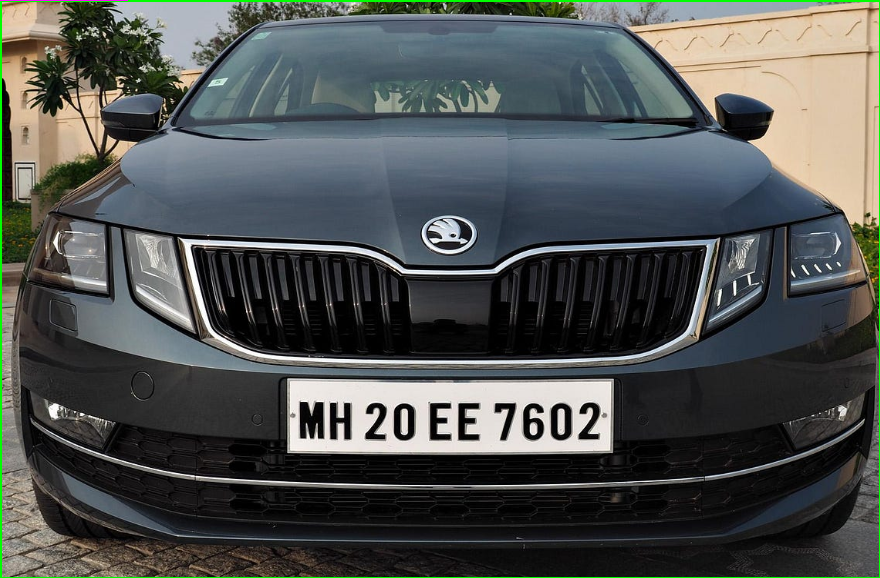

Detected Plate Text: MH20EE7602;


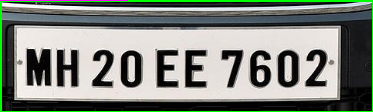

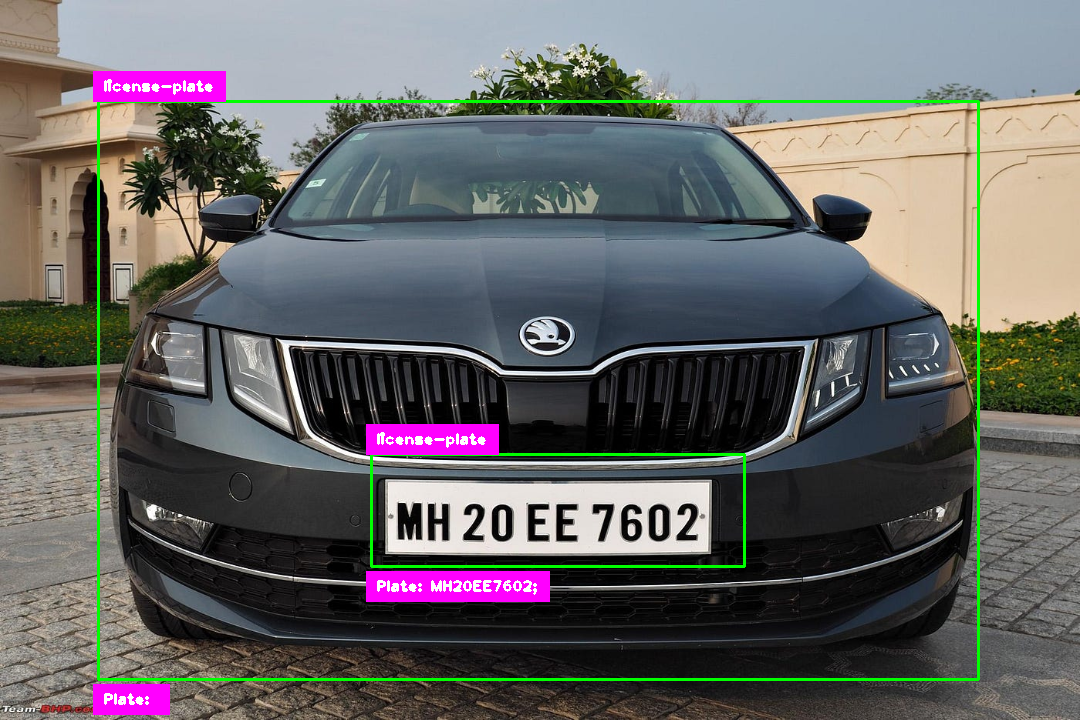

In [ ]:
# STEP 4: Load the trained model and run inference
from ultralytics import YOLO
import cv2
import cvzone
from google.colab.patches import cv2_imshow
import pytesseract

# Load image
image_path = '/content/cap4.jpg'
frame = cv2.imread(image_path)
frame = cv2.resize(frame, (1080, 720))

# Load your trained model (replace with correct path if needed)
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Run inference
results = model(frame)

# Class names (assuming license plate is class 0)
classnames = ['license-plate']

# Process detections
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        class_id = int(box.cls[0])
        classnames = data['names']  # Dynamically matches the model


        if conf > 0.5 and class_name == 'license-plate':
            # Crop tighter plate region
            padding = 3  # small buffer
            x1, y1 = max(x1 + padding, 0), max(y1 + padding, 0)
            x2, y2 = min(x2 - padding, frame.shape[1]), min(y2 - padding, frame.shape[0])
            plate_crop = frame[y1:y2, x1:x2]

            # Preprocess for OCR
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

            # OCR
            plate_text = pytesseract.image_to_string(thresh, config='--psm 7')
            plate_text_cleaned = plate_text.strip().replace("\n", "").replace(" ", "")

            print("Detected Plate Text:", plate_text_cleaned)

            # Draw results
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cvzone.putTextRect(frame, f'{class_name}', [x1 + 5, y1 - 10], thickness=2, scale=1)
            cvzone.putTextRect(frame, f'Plate: {plate_text_cleaned}', [x1 + 5, y2 + 25], thickness=2, scale=1)

            # Show cropped plate
            cv2_imshow(plate_crop)

# Show final image
cv2_imshow(frame)
